# Quantum Circuits
- [Quantum Circuits](https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits)

## Circuits

- **Acyclic**: Information flows from left to right. 

- in the **quantum circuit** model, the wires represent qubits and the gates represent both unitary operations and measurements.

## Quantum Circuits
In the **quantum circuit** model, the wires represent qubits and the gates represent both unitary operations and measurements.

* **Qubits**: Quantum bits, or qubits, are the fundamental units of quantum information. Unlike classical bits, which can only be in a state of 0 or 1, qubits can exist in a superposition of both states simultaneously.

* **Gates**: Quantum gates are operations that manipulate qubits. In the example, the Hadamard gate (circuit.h(0)) is used. The Hadamard gate creates a superposition by transforming the |0⟩ state into (|0⟩ + |1⟩) / √2. Other gates, like X, Y, Z, CNOT, etc., can be used for different quantum operations.

* **Measurements**: Quantum measurement collapses the superposition of qubits into definite classical states. In Qiskit, measurements are performed using the measure method. After measurement, the qubit is in a classical state (either 0 or 1), and the quantum superposition is lost.

* **Simulation**: In the code, the simulation is performed using the Aer simulator, which allows you to simulate quantum circuits on a classical computer. In a real quantum computer, the behavior would be subject to quantum noise and errors.


In [1]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## Circuit I: HSHT

In [2]:
qc = QuantumCircuit(4, 4)

In [3]:
qc.h(0)
qc.s(1)
qc.h(2)
qc.t(3)

In [4]:
qc.measure(3, 3)
qc.draw()

┌───┐   
q_0: ┤ H ├───
     ├───┤   
q_1: ┤ S ├───
     ├───┤   
q_2: ┤ H ├───
     ├───┤┌─┐
q_3: ┤ T ├┤M├
     └───┘└╥┘
c: 4/══════╩═
           3

In [5]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

result = simulator.run(compiled_circuit).result()

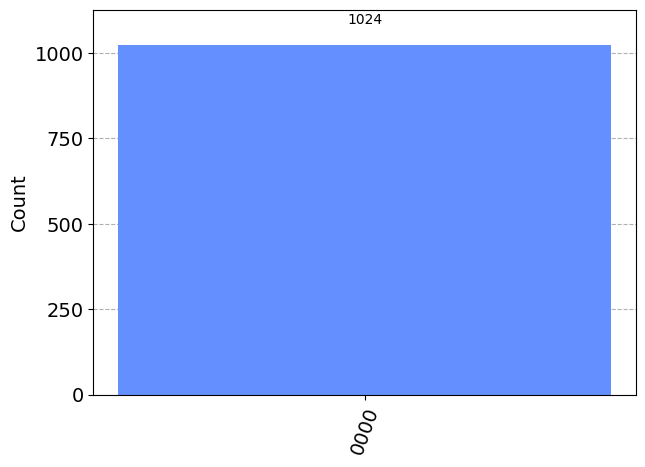

In [6]:
# Visualize the histogram of measurement outcomes
counts = result.get_counts(qc)
plot_histogram(counts)

## Circuit II: Hadamard + Control Not

In [40]:
num_qubits = 2
qc = QuantumCircuit(num_qubits,num_qubits)

In [8]:
qc.h(0)
qc.cx(0,1)

In [9]:
qc.measure(0,0)
qc.draw()

┌───┐     ┌─┐
q_0: ┤ H ├──■──┤M├
     └───┘┌─┴─┐└╥┘
q_1: ─────┤ X ├─╫─
          └───┘ ║ 
c: 2/═══════════╩═
                0

In [10]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

result = simulator.run(compiled_circuit).result()

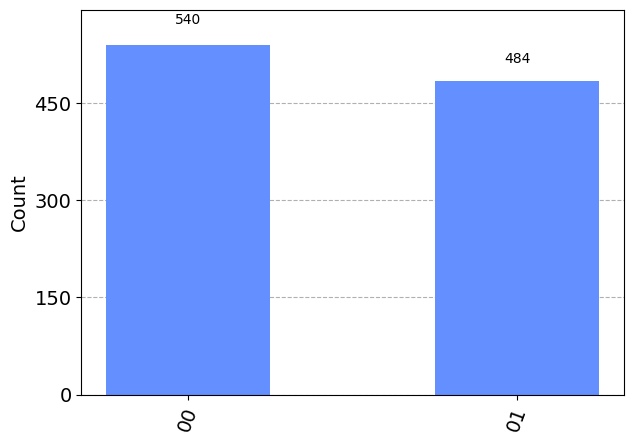

In [11]:
counts = result.get_counts(qc)
plot_histogram(counts)

## Circuit III: Hadamard + Control Not (With More Qubits)

In [35]:
num_qubits = 4
qc = QuantumCircuit(num_qubits, num_qubits)

In [36]:
# Apply Hadamard gates to create a superposition
qc.h(range(num_qubits))

# Apply a series of CNOT gates with a specific pattern
for i in range(num_qubits-1):
    qc.cx(i, i+1)

In [37]:
qc.measure(range(num_qubits),range(num_qubits))
qc.draw()

┌───┐          ┌─┐              
q_0: ┤ H ├──■───────┤M├──────────────
     ├───┤┌─┴─┐     └╥┘     ┌─┐      
q_1: ┤ H ├┤ X ├──■───╫──────┤M├──────
     ├───┤└───┘┌─┴─┐ ║      └╥┘┌─┐   
q_2: ┤ H ├─────┤ X ├─╫───■───╫─┤M├───
     ├───┤     └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_3: ┤ H ├───────────╫─┤ X ├─╫──╫─┤M├
     └───┘           ║ └───┘ ║  ║ └╥┘
c: 4/════════════════╩═══════╩══╩══╩═
                     0       1  2  3

In [38]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

result = simulator.run(compiled_circuit).result()

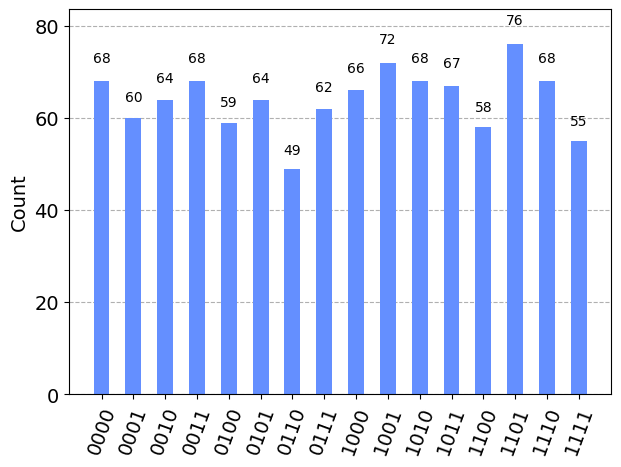

In [39]:
counts = result.get_counts(qc)
plot_histogram(counts)

## Circuit IV: Phase Shift with Rz Gate

In [30]:
num_qubits = 3
qc = QuantumCircuit(num_qubits, num_qubits)

In [31]:
for i in range(num_qubits):
    qc.rz(0.5, i)

In [32]:
qc.measure(range(num_qubits), range(num_qubits))
qc.draw()

┌─────────┐┌─┐      
q_0: ┤ Rz(0.5) ├┤M├──────
     ├─────────┤└╥┘┌─┐   
q_1: ┤ Rz(0.5) ├─╫─┤M├───
     ├─────────┤ ║ └╥┘┌─┐
q_2: ┤ Rz(0.5) ├─╫──╫─┤M├
     └─────────┘ ║  ║ └╥┘
c: 3/════════════╩══╩══╩═
                 0  1  2

In [33]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

result = simulator.run(compiled_circuit).result()

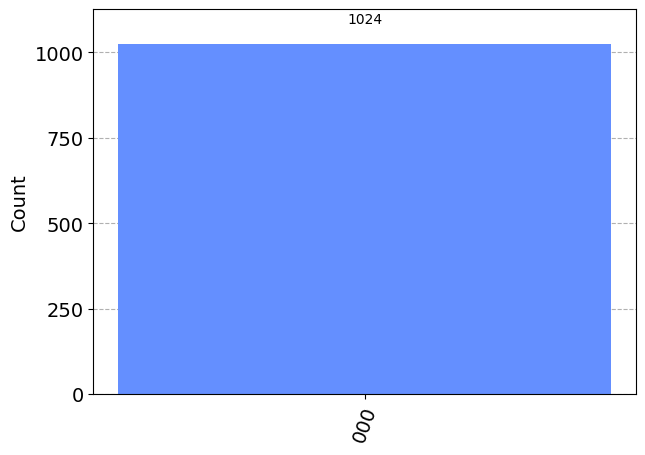

In [34]:
counts = result.get_counts(qc)
plot_histogram(counts)

## Circuit V: Random Rotation Gates

In [24]:
import numpy as np

In [47]:
num_qubits = 6
qc = QuantumCircuit(num_qubits, num_qubits)

In [48]:
# Apply random rotation gates
for i in range(num_qubits):
    theta = np.random.rand() * 2 * np.pi  # Random angle
    phi = np.random.rand() * np.pi        # Random phase
    qc.u(theta, phi, 0, i)

In [49]:
qc.measure(range(num_qubits), range(num_qubits))
qc.draw()

┌─────────────────────┐ ┌─┐               
q_0: ┤ U(0.79971,1.3294,0) ├─┤M├───────────────
     ├─────────────────────┤ └╥┘┌─┐            
q_1: ┤ U(3.5182,0.53486,0) ├──╫─┤M├────────────
     ├─────────────────────┤  ║ └╥┘┌─┐         
q_2: ┤ U(0.74458,2.8658,0) ├──╫──╫─┤M├─────────
     ├─────────────────────┴┐ ║  ║ └╥┘┌─┐      
q_3: ┤ U(2.5413,0.057367,0) ├─╫──╫──╫─┤M├──────
     └┬────────────────────┬┘ ║  ║  ║ └╥┘┌─┐   
q_4: ─┤ U(3.7209,1.9965,0) ├──╫──╫──╫──╫─┤M├───
      ├────────────────────┤  ║  ║  ║  ║ └╥┘┌─┐
q_5: ─┤ U(6.2745,1.5411,0) ├──╫──╫──╫──╫──╫─┤M├
      └────────────────────┘  ║  ║  ║  ║  ║ └╥┘
c: 6/═════════════════════════╩══╩══╩══╩══╩══╩═
                              0  1  2  3  4  5

In [50]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

result = simulator.run(compiled_circuit).result()

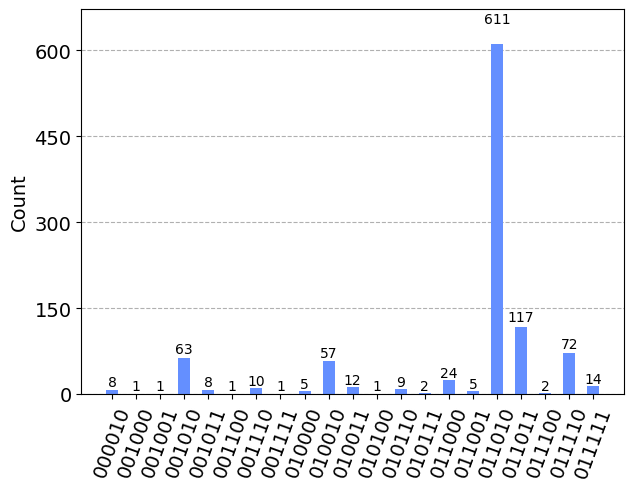

In [51]:
counts = result.get_counts(qc)
plot_histogram(counts)

## Circuit V: Random Entanglement Pattern

In [42]:
import random

In [41]:
num_qubits = 6
qc = QuantumCircuit(num_qubits, num_qubits)

In [43]:
qc.h(range(num_qubits))

for _ in range(num_qubits):
    control = random.randint(0, num_qubits - 1)
    target = random.randint(0, num_qubits - 1)
    while target == control:
        target = random.randint(0, num_qubits - 1)
    qc.cx(control, target)

In [44]:
qc.measure(range(num_qubits), range(num_qubits))
qc.draw()

┌───┐┌───┐             ┌───┐             ┌─┐      
q_0: ┤ H ├┤ X ├─────────────┤ X ├──■──────────┤M├──────
     ├───┤└─┬─┘┌───┐   ┌───┐└─┬─┘  │  ┌─┐     └╥┘      
q_1: ┤ H ├──┼──┤ X ├───┤ X ├──┼────┼──┤M├──────╫───────
     ├───┤  │  └─┬─┘┌─┐└─┬─┘  │    │  └╥┘      ║       
q_2: ┤ H ├──┼────┼──┤M├──┼────┼────┼───╫───────╫───────
     ├───┤  │    │  └╥┘  │    │  ┌─┴─┐ ║ ┌───┐ ║ ┌─┐   
q_3: ┤ H ├──┼────┼───╫───┼────■──┤ X ├─╫─┤ X ├─╫─┤M├───
     ├───┤  │    │   ║   │   ┌─┐ └───┘ ║ └─┬─┘ ║ └╥┘   
q_4: ┤ H ├──┼────■───╫───■───┤M├───────╫───┼───╫──╫────
     ├───┤  │        ║       └╥┘       ║   │   ║  ║ ┌─┐
q_5: ┤ H ├──■────────╫────────╫────────╫───■───╫──╫─┤M├
     └───┘           ║        ║        ║       ║  ║ └╥┘
c: 6/════════════════╩════════╩════════╩═══════╩══╩══╩═
                     2        4        1       0  3  5

In [45]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

result = simulator.run(compiled_circuit).result()

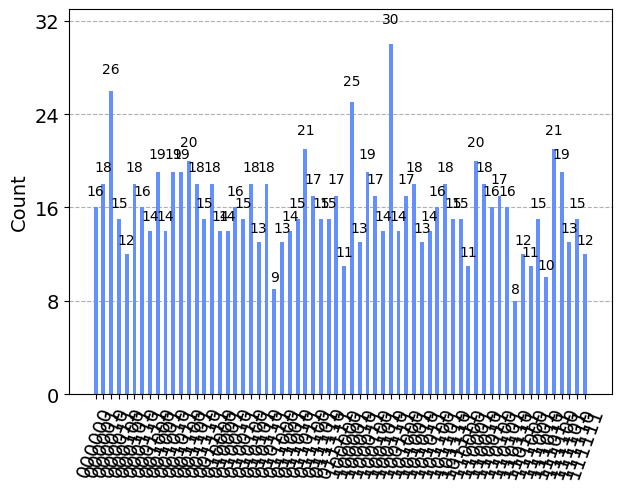

In [46]:
counts = result.get_counts(qc)
plot_histogram(counts)